In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml('mnist_784',version=1, return_X_y=True)

In [3]:
pixel_values, targets = data
targets = targets.astype(int)

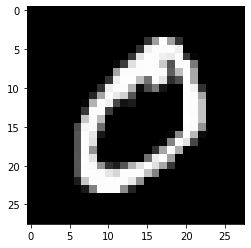

In [5]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [10]:
tsne = manifold.TSNE(n_components=3, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [11]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                      columns=["x", "y", "z", "targets"])

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


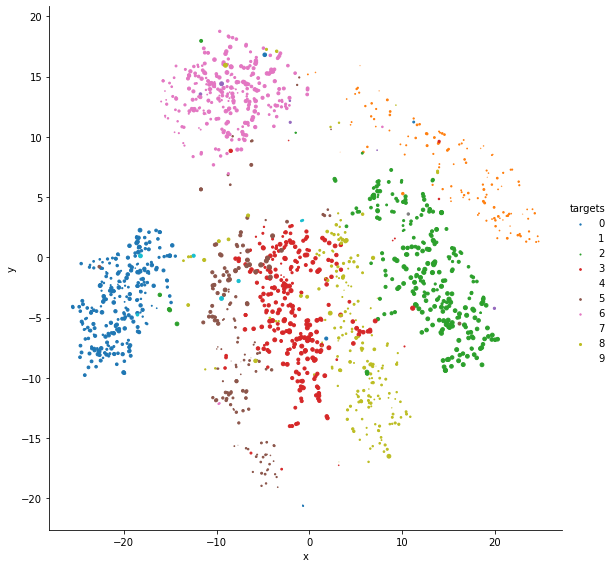

In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y", "z").add_legend()